# Introduction to pySPM a python library for ToF-SIMS data analysis
## Installation
A python library called pySPM was developped in order to read and parse data from SPM and ToF-SIMS instruments.
The first thing is to have python installed.
### Python installation
The quick way is to install anaconda: https://www.anaconda.com/download/
It will install python and all important packages for you.

I personally prefer to install the original python from https://www.python.org/downloads/

Make sure during the installation of python that you click the checkbox "add Python to PATH" or something similar.
### pySPM library installation

The library can be installed with pip. On windows open a terminal (click on <kbd>⊞ Win</kbd>+<kbd>R</kbd> and type `cmd`). Inside the terminal type:

`pip install pySPM`

or if you already have it, you can update it to the latest stable version

`pip install -U pySPM`

The library is also available on github https://github.com/scholi/pySPM

## Running python
OK, now that the library is installed we will need an interface to type python code. There is many different possibilities depending on the tase of the users.
Please have a look at:
* Jupyter notebook
* Spyder
* IDLE
* External notepad

### Jupyter notebook
Probably the easiest way for newcomer and the best way for data analysis. If you installed python via anaconda you might find a shortcut for jupyter notebook. Otherwise get a windows terminal (click on <kbd>⊞ Win</kbd>+<kbd>R</kbd> and type `cmd`) and then type:

`jupyter notebook`

If an error occurs, please try to type `pip install notebook` first.
This should opens a new page on your browser. Then click on the top right corner on the button "New ▼", then choose python 3.
This will open a new notebook where you can type python code and run it.

# Let's begin
This tutorial is compatible with user having NO experience at all with python. So let's start with the basics. 
## Python essentials
Python understand each line as a statement. So there is no special character needed to terminate a command.
Tabulations or spaces defines block (we will see that later).
Finally and importantly everything written after a `#` is treated as a comment till the end of the line.

Another important thing to undestand with python is a list. They are defined by the square brackets and can be of mixed types:

`mylist = [1, 2, "test", 3.2]`

You can acces the element of a list by it's index (first element has index 0, the second 1, …)

`second_element = mylist[1]
print(second_element)`

and the output is `2`

## Importing libraries
Python have a limited number of function which can be runned and they can be extended by libraries, like the pySPM. In order to use them we should import them. There is three different ways of importing a library:
### import command
`import library1`
you can then access all functions of library1 as follow:
`library1.func1()` for example in order to access the function func1 of library1

Sometime the name of the library is too long to type it all the time or the name might conflicts with other funtions. In this case you can import a library with an alias.
`import librar2 as lib`
you can then access all functions of library2 as follow:
`lib.func1()`

Sometime you might want to avoid to have to type the name of the library at all or you don't want to load the whole library, but only some modules.
`from library3 import func1`
`from library3 import func2 as f`
`from library4 import *`

so now you can dirrectly type `func1()` in order to run the function func1 from library3, you can type `f()`in order to run func2 from library3 and finally if library4 had a function called fun3, func4 and fun5, you can acces them by typing directly `func3()`, `func4()` or `func5()`

### What to import for ToF-SIMS data analysis
There are 3 main libraries that we are going to use in order to handle ToF-SIMS data. Those are:
* numpy
* matplotlib
* pySPM

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pySPM
print(pySPM.__version__)

%matplotlib inline

0.2.15


## Data
Some dummy data are avaible with the pySPM_data library (`pip install pySPM_data`) in order to install them.

In [8]:
from pySPM_data import get_data

## Loading the data
Let's first focus on a simple spectra saved on an ITA file. For the example we are going to investigate the measurement performed on a Cysteine amino acid with Bi₃⁺ with a positive polarity. But you can change the filename with the data of your choice. Please not that in python, like most programming language, the backslash `\`is treated as a special character and thus "\n" will be understood as a new line and not as "backslash n". If you run windows and want to copy paste the name of a file, add the letter r in front of the quotes as follow:

`filename = r"C:\Users\ols\AppData\Local\Programs\Python\Python36\Lib\site-packages\pySPM_data\data\Cysteine_B3p_p_01_0.ita"`

In [9]:
# Let's retriev the filename from the pySPM_Data library with the get_data command
filename = get_data("Cysteine_B3p_p_01_0.ita")
print(filename)
A = pySPM.ITA(filename)

c:\users\scholi\appdata\local\programs\python\python36\lib\site-packages\pySPM_data\data\Cysteine_B3p_p_01_0.ita


You can use any variable name. Here we chose `A` because it's short, but be free to choose whatever you like.
Ok now we have an object call `A` which contains all the data. What can we do with it?
First thing is to get a summary of the measurement.

## show summary of measurement


        Analysis time: 00:01:21.92
        Delayed extraction: 0 s
        LMIG's Lens source: 3.27 kV
        Sputter species: Cs @ Off
        Field of View: 200.00 um
        Pixel size: 128 × 128
        Polarity: Positive
        Pixel Size: 1.56 um
        Shots per pixel: 1
        Raster mode: sawtooth
        Number of scans: 50
        Cycle time: 100 us (Upper mass: 458.44 )
Peaks:
	▸ total (nan - nanu)
	▸ sum of rest (nan - nanu)


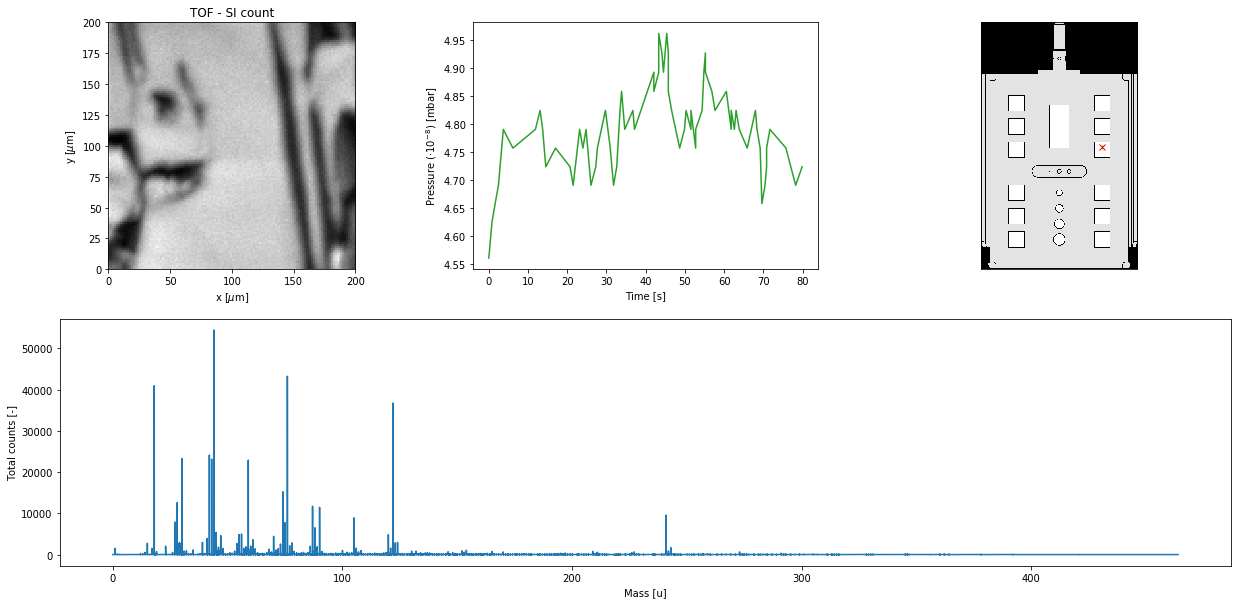

In [10]:
A.show_summary()

You will get the measurement time in H:M:S as well as other important infomations. Then we get 3 to 4 plots on the top. The Secondary Ion image (total ions), then if available the "Video Snapshot" (not present in this particular measurement), then plots of the main parameters during the measurement if available. Those are:
* Emission current (absant from this measurement)
* Pressure in the main chamber
* LMIG Supressor voltage (absant from this measurement)

On the very right you should get an image of the stage used with a red cross of the measurement position.
The bottom plot should display the mass spectra.

Now let's have a deeper look at the spectra.
## Spectra plotting
In case the mass callibration was perform on the iontof software, you can then plot the spectra directly:

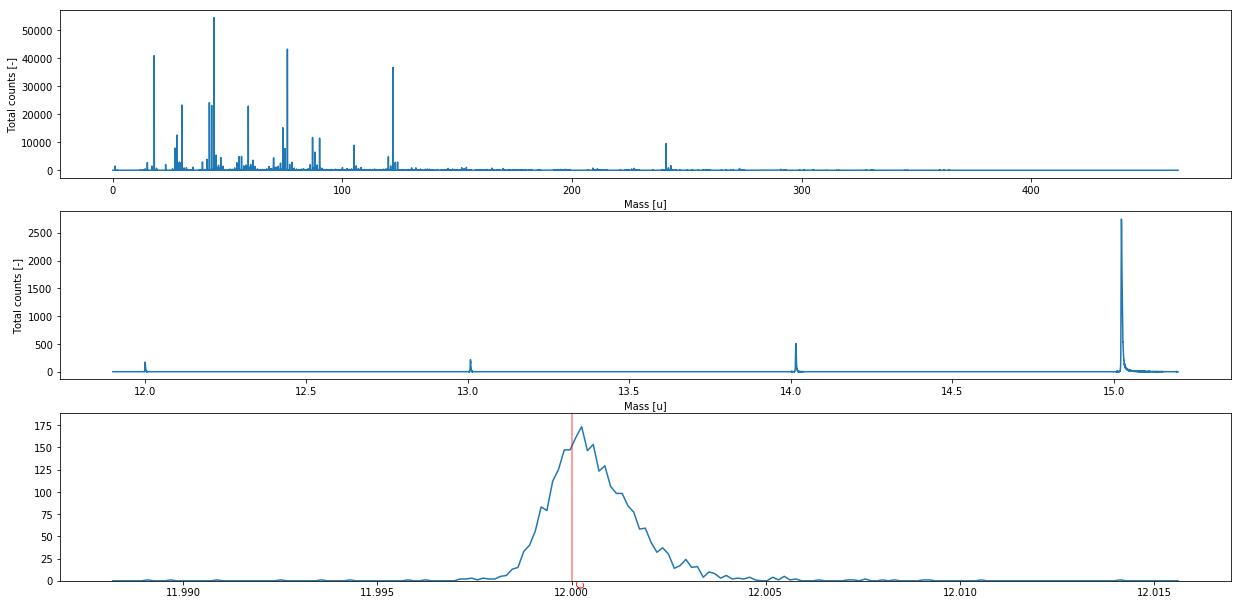

In [11]:
# Create 3 subplots plots with a specific size. 21 seems to be the width of the notebook
fig, ax = plt.subplots(3, 1, figsize=(21, 3*3.5)) # ax is then a list of all axes
A.showSpectrum(ax=ax[0]) # plot it on top. With no other arguments, it plots the whole spectrum
A.showSpectrum(ax=ax[1], low=11.9, high=15.2) # We can zoom in by specifying the low and high limits
A.showSpectrumAround("C", ax=ax[2]); # We can zoom directly at a specific nominal mass with showSpectrumAround.
#It also displays known elements from a non-complete database

Let's try to figure out if the mass calibration was correctly performed. Let's look at well know peaks. The molecule Cysteine has formula HS-CH₂-CH-(NH₂)-COOH
Instead of the nominal mass we can also use the formula

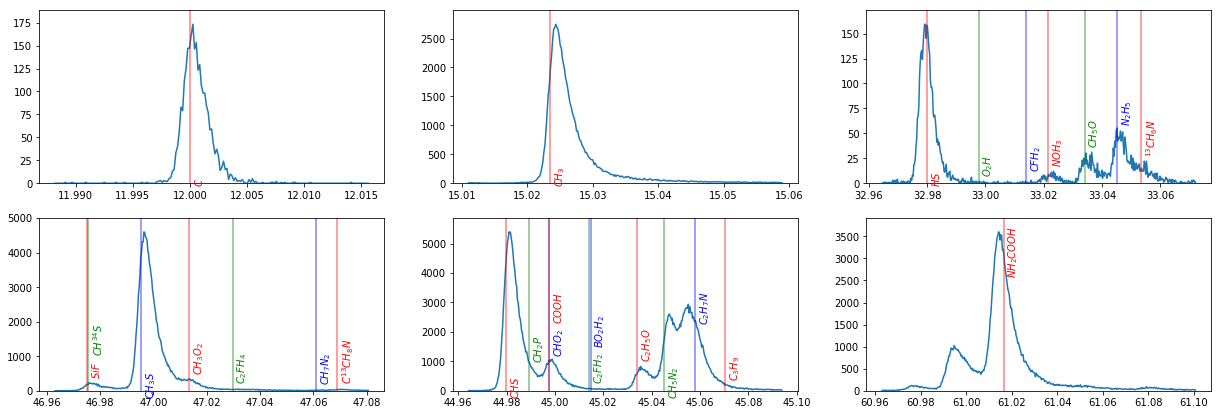

In [12]:
# Create 3 subplots plots with a specific size. 21 seems to be the width of the notebook
fig, ax = plt.subplots(2, 3, figsize=(21, 2*3.5)) # ax is then a list of all axes
ax = np.ravel(ax) # ax is a 2D array. Ravel makes it flat which allows us to type ax[0] instead of ax[0,0], ax[1] instead of ax[0,1], etc.
A.showSpectrumAround("C", ax=ax[0]);
A.showSpectrumAround("CH3", ax=ax[1]);
A.showSpectrumAround("HS", ax=ax[2]);
A.showSpectrumAround("CH3S", ax=ax[3]);
A.showSpectrumAround("COOH", ax=ax[4]);
A.showSpectrumAround("NH2COOH", ax=ax[5], include_only=["NH2COOH"]); # Sometimes there are too many peaks and you want to display only some

We can test if the peaks of various isotopes respect the abundancy ratio in order to check if the peak attribution was done correctly.
Nevertheless we notice that the mass calibration is not optimale as the peak of C has a center of lower mass while CHS is the opposite.

Fortunately, the pySPM library has an auto callibration procedure to find the sf and k0 term for the mass callibration

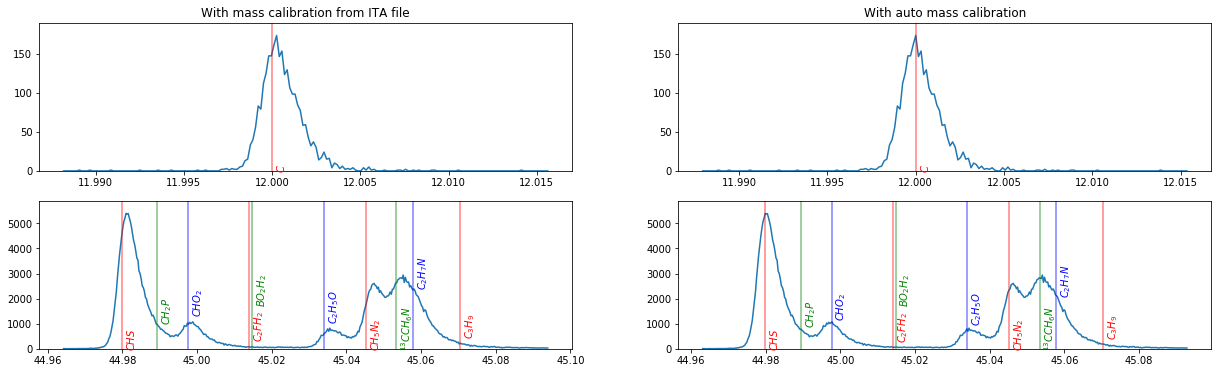

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(21,6))
sf, k0 = A.autoMassCal(FittingPeaks=["C","CH","CH2","CHS"])
A.showSpectrumAround(12, ax=ax[0,1], sf=sf, k0=k0);
A.showSpectrumAround(45.03, ax=ax[1,1], sf=sf, k0=k0, include=["^13CCH6N"]);
A.showSpectrumAround(12, ax=ax[0,0]);
A.showSpectrumAround(45.03, ax=ax[1,0], include=["^13CCH6N"]);
ax[0,0].set_title("With mass calibration from ITA file")
ax[0,1].set_title("With auto mass calibration");

### Verify the isotopic ratios
To verify is the peaks assignment are correct one way is to check if the intensities correlates with the isotopes abundancy. For this reason we believe that the peak CHS is correct and this explain why it was used above for the mass calibration

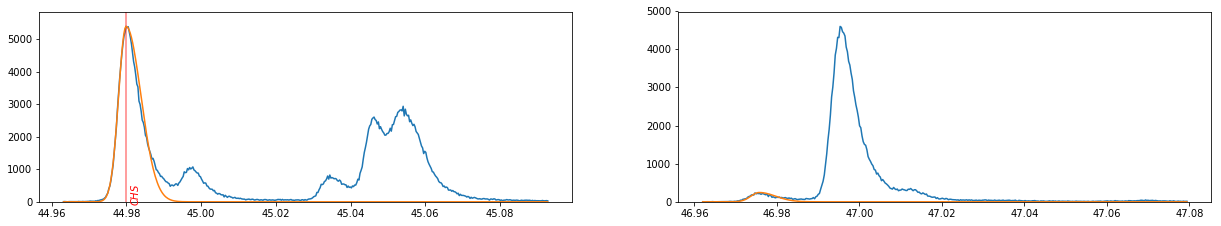

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(21, 3.5))

A.showSpectrumAround("CHS", ax=ax[0], include_only="CHS", sf=sf, k0=k0)
A.showSpectrumAround("CH^34S", ax=ax[1], include_only="CHS", sf=sf, k0=k0)

pySPM.utils.plot_isotopes("CHS", ax=ax[0]);
pySPM.utils.plot_isotopes("CHS", ax=ax[1], main=ax[0]); # main indicates which axis contains the main peak which will be used to fit amplitude and sig if not in ax

Here we can confirm that the peak CH₃S is well assigned as the amplitude of CH₃³⁴S match well with the isotopic abundancy

###  Peak fitting and resolution of overlapping peaks
Taking the sum of all counts between a lower and an upper mass as an intensity reference is a bad idea when peaks starts to overlap.
It seems to be still the standard in iontof software making a good reason to switch to this library ;)

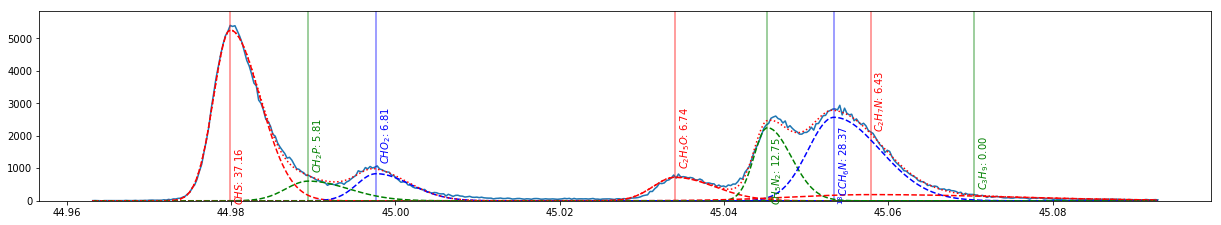

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(21, 3.5))
v = A.showSpectrumAround(45.03, sf=sf, k0=k0, include=["^13CCH6N"], exclude=["BO2H2","C2FH2"], dofit=True, sig0=.0018, asym0=2.3, ax=ax);

You can now retrieve the fitting parameters (here the variable v). You can also use a pandas DataFram to work more efficiently with the result. Here the Peak intensity will be refected by the Area

In [16]:
import pandas as pd
values = pd.DataFrame(v).transpose()
values

Amp          Area     assym        dm  fit  \
$CHO_{2}$        8.344358e+02  6.812488e+00  1.789364 -0.306341  0.0   
$CH_{2}P$        6.059283e+02  5.807438e+00  1.789364 -0.306397  0.0   
$^{13}CCH_{6}N$  2.570771e+03  2.836610e+01  1.789364 -0.305962  0.0   
$C_{2}H_{7}N$    1.907787e+02  6.428356e+00  1.789364 -0.305932  0.0   
$CHS$            5.257655e+03  3.716061e+01  1.789364 -0.306462  0.0   
$CH_{5}N_{2}$    2.250850e+03  1.275192e+01  1.789364 -0.306017  0.0   
$C_{3}H_{9}$     9.390136e-11  3.281444e-12  1.789364 -0.305846  0.0   
$C_{2}H_{5}O$    7.208164e+02  6.740542e+00  1.789364 -0.306094  0.0   

                        m0       mass       sig  
$CHO_{2}$        44.997654  44.997640  0.002335  
$CH_{2}P$        44.989412  44.989398  0.002742  
$^{13}CCH_{6}N$  45.053379  45.053365  0.003156  
$C_{2}H_{7}N$    45.057849  45.057835  0.009638  
$CHS$            44.979896  44.979882  0.002022  
$CH_{5}N_{2}$    45.045273  45.045259  0.001621  
$C_{3}H_{9}$     45.070425  45.070412  0.009996  
$C_{2}H_{5}O$    45.034040  45.034026  0.002675

## Molecule identification / verification
First we adjust slightly the mass callibration as it was performed only for low masses.

Positive


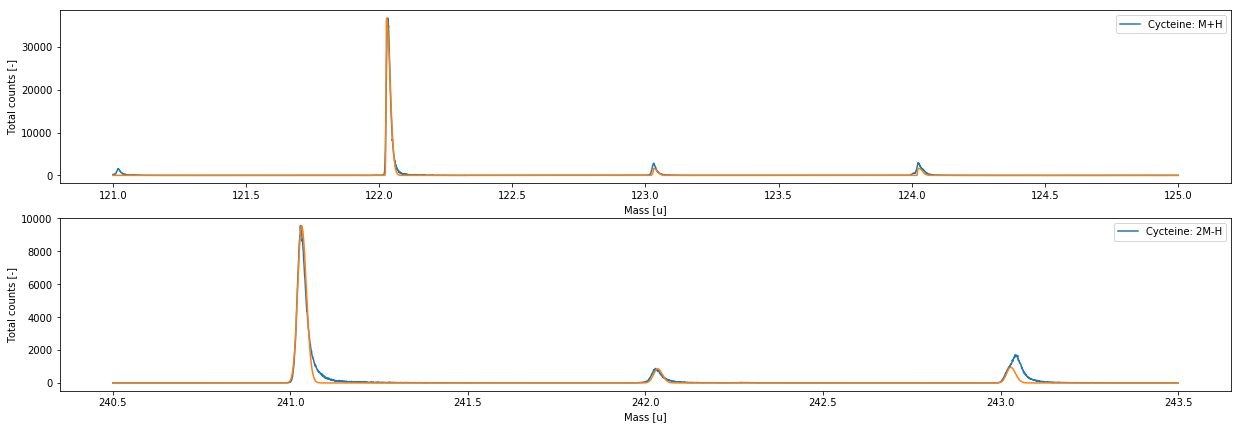

In [17]:
from pySPM.utils import Molecule, H
M = pySPM.utils.Molecule("C3H7O2NS")

fig, (ax, ax2) = plt.subplots(2, 1, figsize=(21,7))

A.showSpectrum(low=121, high=125, ax=ax, label="Cycteine: M+H", sf=sf-5, k0=k0);
pySPM.utils.plot_isotopes(M+H, ax=ax);
ax.legend();

A.showSpectrum(low=240.5, high=243.5, ax=ax2, label="Cycteine: 2M-H", sf=sf-5, k0=k0);
pySPM.utils.plot_isotopes(2*M-H, ax=ax2);
ax2.legend();
print(A.polarity)

As the polarity is positive we would expect to find a peak at M+H which is the case here.
Strangely we don't see a peak at 2M+H, but as 2M-H!?!

## Spectra of Region-Of-Interest (ROI)
It can be seen on the SI image that the sample is not homogeneous

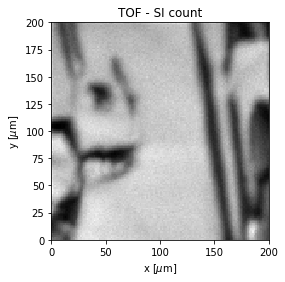

In [18]:
A.getIntensity().show();

### Defininfgthe region of interest by thresholding the SI data

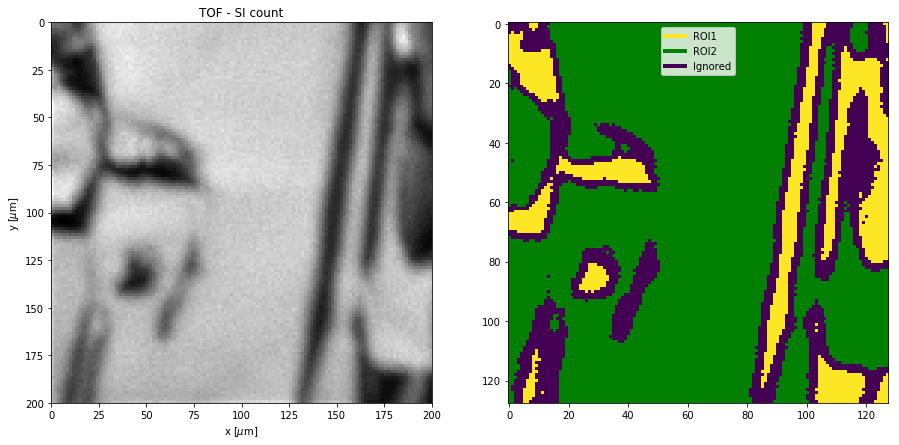

In [19]:
fig, ax = plt.subplots(1,2,figsize=(15,7))
SI = A.getIntensity()
ROI1 = 1-SI.get_bin_threshold(.3)
ROI2 = SI.get_bin_threshold(.6)
SI.show(ax=ax[0],flip=True)
p1 = ax[1].imshow(ROI1, cmap='viridis')
p2 = pySPM.utils.plotMask(ax[1], ROI2, 'g')
lines = [
    mpl.lines.Line2D([0], [0], lw=4, color=mpl.cm.viridis.colors[-1]),
    mpl.lines.Line2D([0], [0], lw=4, color='g'),
    mpl.lines.Line2D([0], [0], lw=4, color=mpl.cm.viridis.colors[0])]
ax[1].legend(lines, ["ROI1", "ROI2","Ignored"],loc='upper center');

### Calculate the spectra for each region of interest
The reconstruction is still slow for the moment. The algorithm is not optimized as the developer don't use it very often...

In order to retrieve the spectra for each ROI, we need the ITM file!

In [20]:
AI = pySPM.ITM(get_data("Cysteine_B3p_p_01.itm"))
sf, k0 = A.autoMassCal()
try:
    # Reconstruction is a slow porcess, so the data are stored in order to speed up the running speed of this notebook
    res = pySPM.utils.load("Intro_pySPM_tofsims", 'Cysteine_ROI')
except:
    res = AI.getRawSpectrum(ROI=[ROI1, ROI2], prog=True, sf=sf, k0=k0)
    pySPM.utils.save("Intro_pySPM_tofsims", Cysteine_ROI=res)

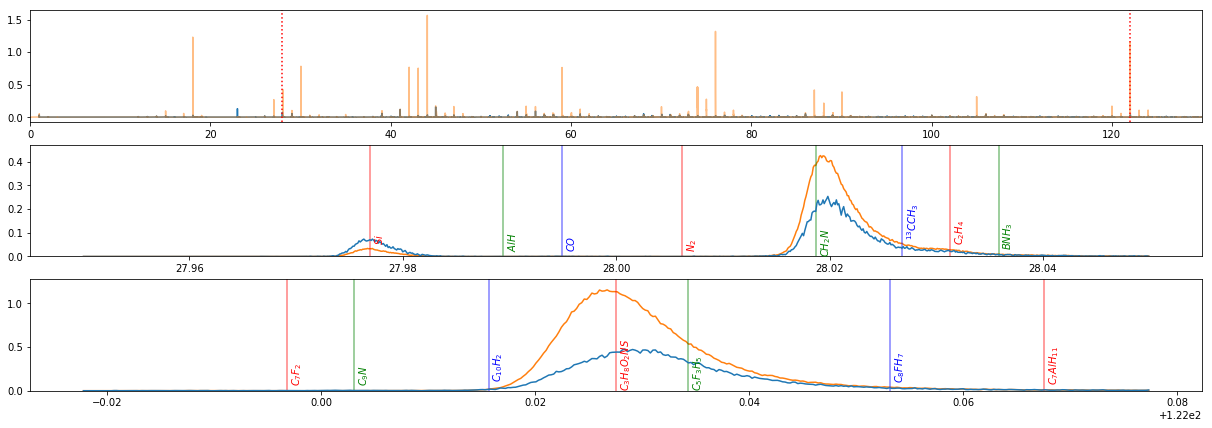

In [21]:
# Spectrum of ROI1/ROI2 normalized by the number of pixels it contains
m = res[0]
s1 = res[1][:, 0]/np.sum(ROI1)
s2 = res[1][:, 1]/np.sum(ROI2)
fig, ax = plt.subplots(3,1, figsize=(21,7))

mask1 = s1>s2
mask2 = s2>s1
ax[0].plot(m[mask1], s1[mask1])
ax[0].plot(m[mask2], s2[mask2], alpha=.5)
ax[0].set_xlim((0, 130));
ax[0].axvline(pySPM.utils.get_mass("Si"), color='r', ls=':');
ax[0].axvline(pySPM.utils.get_mass("C3H8O2NS"), color='r', ls=':');

pySPM.utils.showPeak(m, s2, 28, .05, ax=ax[1], curve_color='C1');
pySPM.utils.showPeak(m, s1, 28, .05, ax=ax[1], showElts=False, curve_color='C0');

pySPM.utils.showPeak(m, s2, "C3H8O2NS", .05, ax=ax[2], curve_color='C1');
pySPM.utils.showPeak(m, s1, "C3H8O2NS", .05, ax=ax[2], showElts=False, curve_color='C0');

## ToF-SIMS images
Let's now analyse an ITA files which saved images and not only a spectra. 

In [22]:
filename2 = get_data("BigSmiley.ita")
B = pySPM.ITA(filename2)


        Analysis time: 00:26:12.86
        Delayed extraction: 1.20 us
        LMIG's Lens source: 3.38 kV
        Sputter species: Cs @ 250 V
        Field of View: 100.00 um
        Pixel size: 512 × 512
        Polarity: Negative
        Pixel Size: 195.31 nm
        Shots per pixel: 1
        Raster mode: random
        Number of scans: 100
        Cycle time: 60 us (Upper mass: 309.94 )
Peaks:
	▸ total (0.000 - 309.945u)
	▸ sum of rest (0.000 - 309.945u)
	▸ CH- (12.986 - 13.035u)
	▸ O- (15.972 - 16.027u)
	▸ OH- (16.979 - 17.034u)
	▸ F- (18.972 - 19.030u)
	▸ C_2- (23.969 - 24.032u)
	▸ C_2H- (24.976 - 25.043u)
	▸ CN- (25.972 - 26.040u)
	▸ BO- (26.972 - 27.042u)
	▸ Si- (27.941 - 28.013u)
	▸ SiH- (28.947 - 29.020u)
	▸ ^30Si- (29.944 - 30.018u)
	▸ O_2- (31.948 - 32.026u)
	▸ PH_2- (32.949 - 33.026u)
	▸ Cl- (34.933 - 35.012u)
	▸ ^37Cl- (36.931 - 37.014u)
	▸ C_2O- (39.958 - 40.042u)
	▸ BNO- (40.966 - 41.053u)
	▸ CHNO- (42.966 - 43.055u)
	▸ CHO_2- (44.950 - 45.042u)
	▸ 59.98u (59.911 - 60

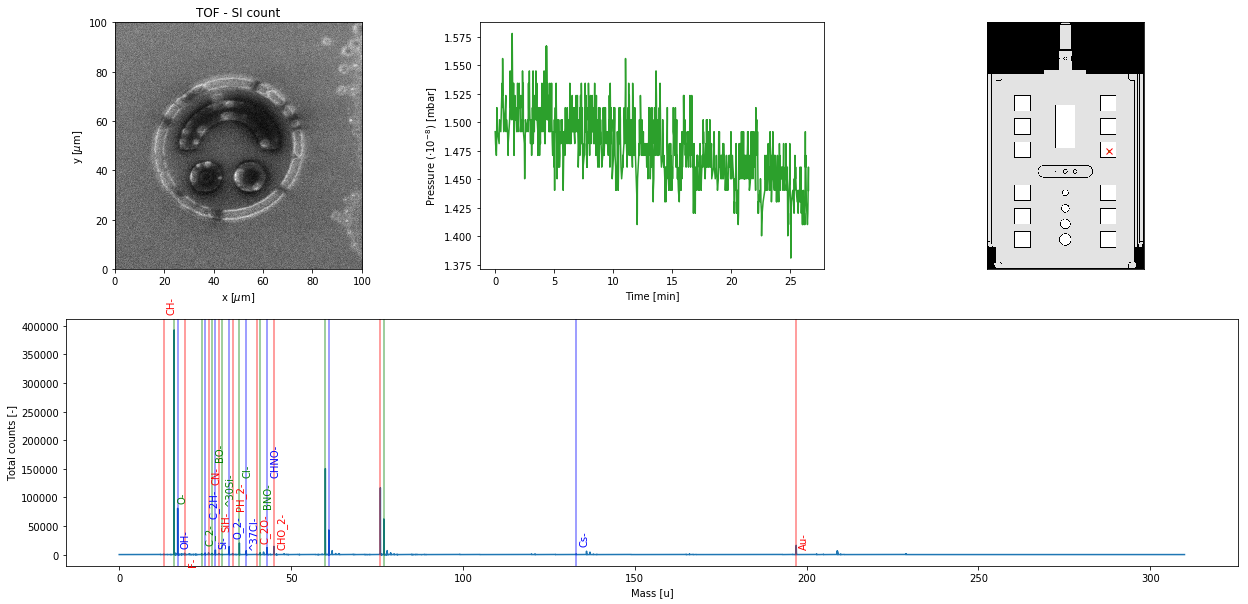

In [23]:
B.show_summary()

We see a list of peaks above. We can also retrieve only the peak list as follow:

In [24]:
B.show_masses()

0: (total) [] 0.00u - 309.94u (center: 154.97u)
1: (sum of rest) [] 0.00u - 309.94u (center: 154.97u)
2: () [CH-] 12.99u - 13.03u (center: 13.01u)
3: () [O-] 15.97u - 16.03u (center: 15.99u)
4: () [OH-] 16.98u - 17.03u (center: 17.00u)
5: () [F-] 18.97u - 19.03u (center: 19.00u)
6: () [C_2-] 23.97u - 24.03u (center: 24.00u)
7: () [C_2H-] 24.98u - 25.04u (center: 25.01u)
8: () [CN-] 25.97u - 26.04u (center: 26.00u)
9: () [BO-] 26.97u - 27.04u (center: 27.00u)
10: () [Si-] 27.94u - 28.01u (center: 27.98u)
11: () [SiH-] 28.95u - 29.02u (center: 28.98u)
12: () [^30Si-] 29.94u - 30.02u (center: 29.99u)
13: () [O_2-] 31.95u - 32.03u (center: 31.97u)
14: () [PH_2-] 32.95u - 33.03u (center: 32.98u)
15: () [Cl-] 34.93u - 35.01u (center: 34.97u)
16: () [^37Cl-] 36.93u - 37.01u (center: 36.97u)
17: () [C_2O-] 39.96u - 40.04u (center: 40.00u)
18: () [BNO-] 40.97u - 41.05u (center: 41.00u)
19: () [CHNO-] 42.97u - 43.05u (center: 43.00u)
20: () [CHO_2-] 44.95u - 45.04u (center: 45.00u)
21: () [] 59.

the ITA file save one image per scan and per channel as well as the sum of all sacan for each channel.
The sum of all scan can be retrieved by the getAddedImage functions. Either by mass, by name or by channel ID.
⚠ If you have two overlapping peaks with the same mass, only the first one found will be selected.

The getAddedImageByName is a search function and will use all channels having the pattern given in argument.
In the example below you can see that `A.getAddedImageByName("Si")` will return the _Si_ AND the _SIH_ channels.
If one whish to has only the Si, the argument `strict=True` can be passed to the function 

=== channels for image Six ===
10: () [Si-] 27.94u - 28.01u (center: 27.98u)
11: () [SiH-] 28.95u - 29.02u (center: 28.98u)

=== Channels for image Si ===
10: () [Si-] 27.94u - 28.01u (center: 27.98u)


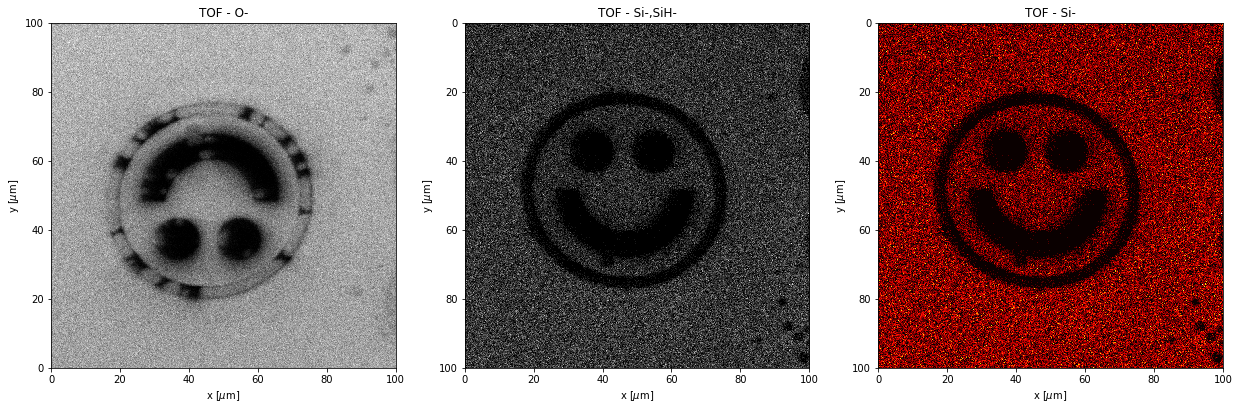

In [25]:
O = B.getAddedImageByMass(16)
Six, ch1 = B.getAddedImageByName("Si") # retrieve the image for Si and the list of all channel selected
Si, ch2 = B.getAddedImageByName("Si", strict=True)
print("=== channels for image Six ===")
B.show_masses(ch1)
print("\n=== Channels for image Si ===")
B.show_masses(ch2)

fig, ax = plt.subplots(1,3,figsize=(21,7))
O.show(ax=ax[0])
Six.show(ax=ax[1], flip=True); # flip=True, flips the image upside-down
Si.show(ax=ax[2], flip=True, cmap='hot'); # cmap can be used to define the colormap. Try 'hot', 'inferno', 'viridis' and 'gray' are the most common ones

### Collection
A collection is a set of images sharing the same size. For ITA we can use the ITA_collection. By default it will load all the channels.
It might be handy to see quickly what was recorded as follow:

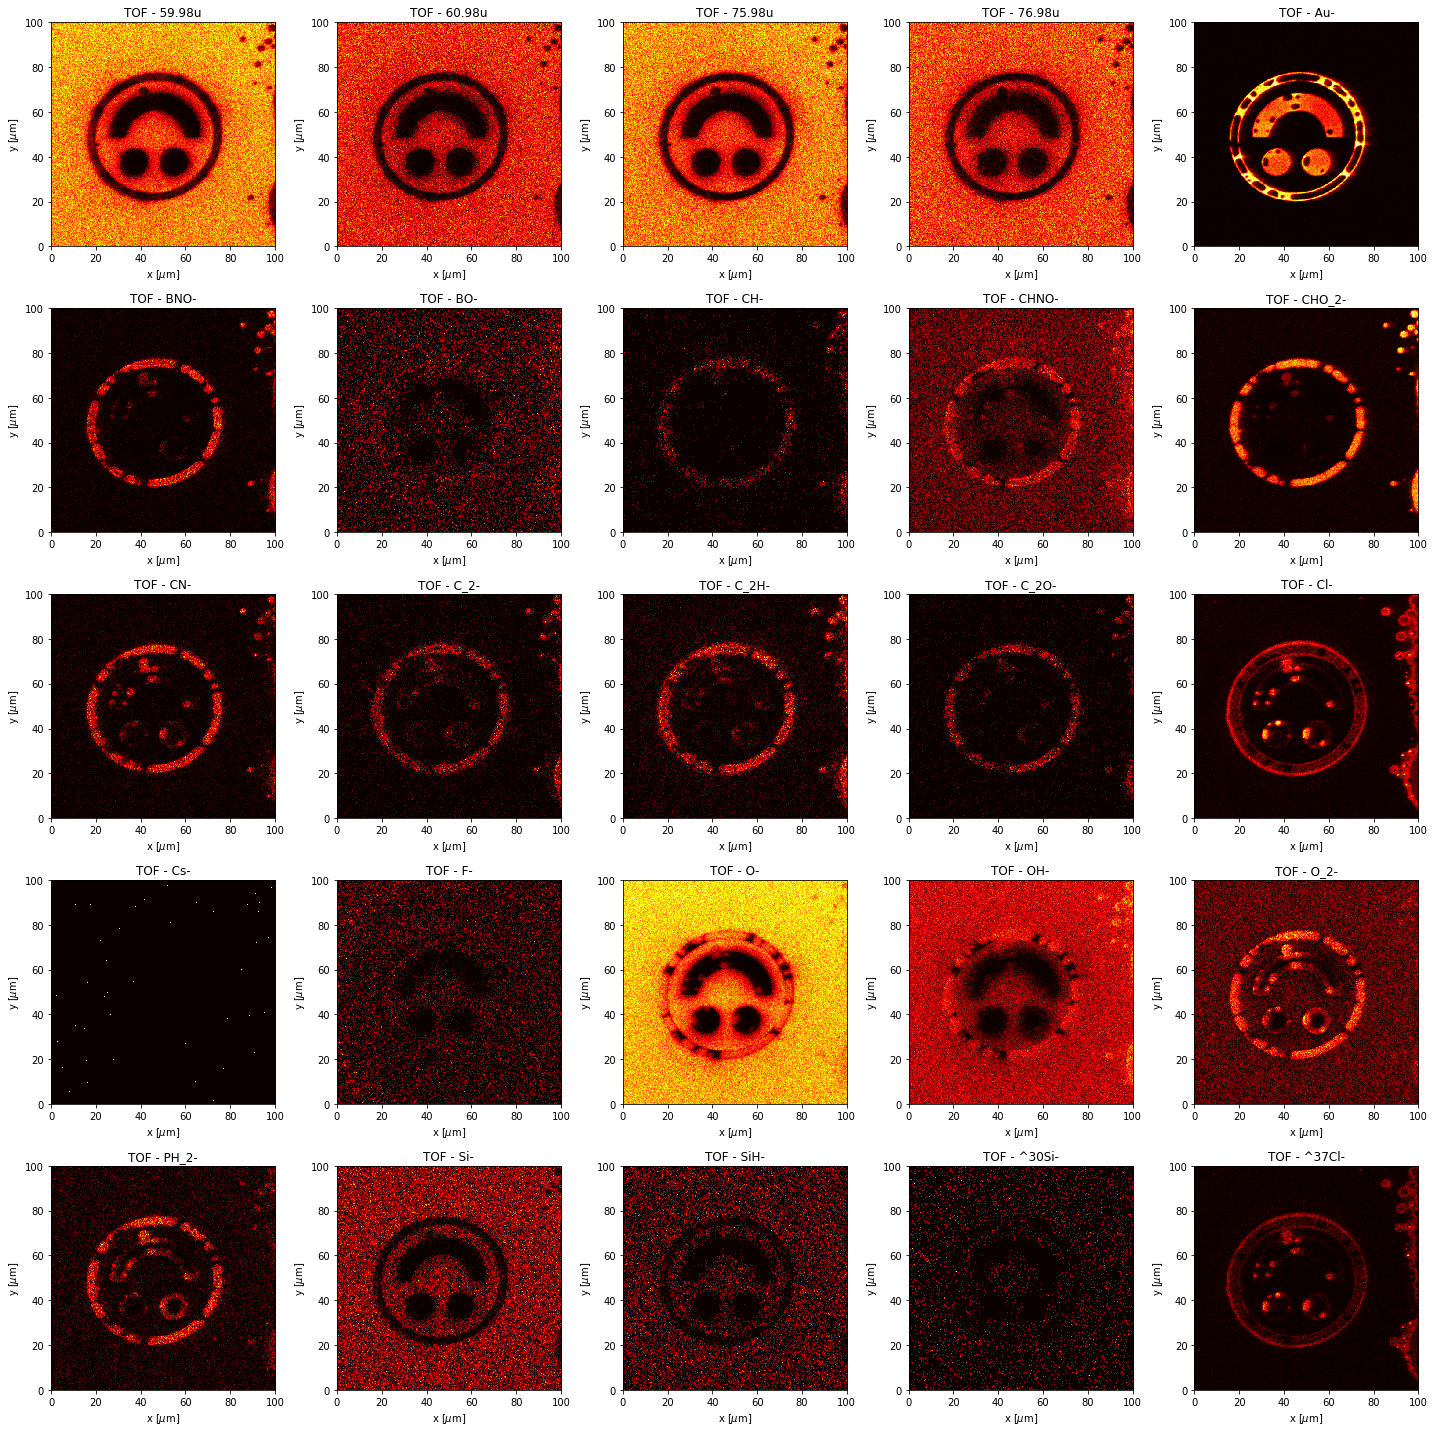

In [26]:
col = pySPM.ITA_collection(filename2)
col.show(ncols=5)

### Overlay
One advantage of a collection is that we can create easily overlays from several channels as follow:

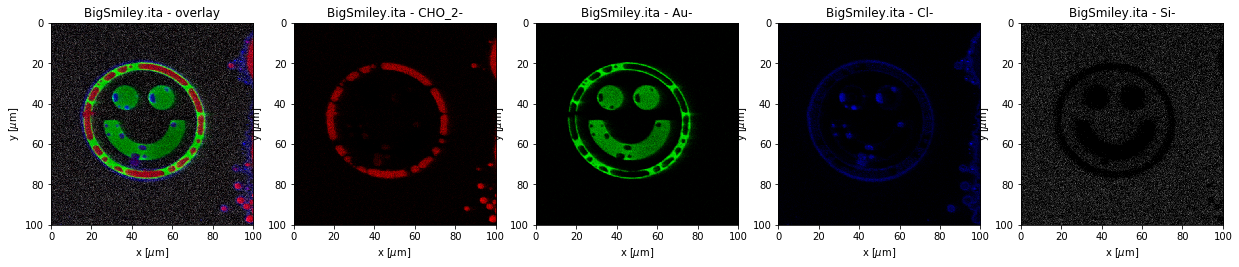

In [27]:
overlay, rgb = col.overlay(["CHO_2-","Au-","Cl-","Si-"], colors=[[1,0,0],[0,1,0],[0,0,1],[.5,.5,.5]])

fig, ax = plt.subplots(1,5,figsize=(21,5))
overlay.show(ax=ax[0], flip=True);
for i, ch in enumerate(rgb):
    ch.show(ax=ax[i+1], flip=True);

### Profiles

FWHM left-edge:710.7nm  right-edge: 1908.4nm


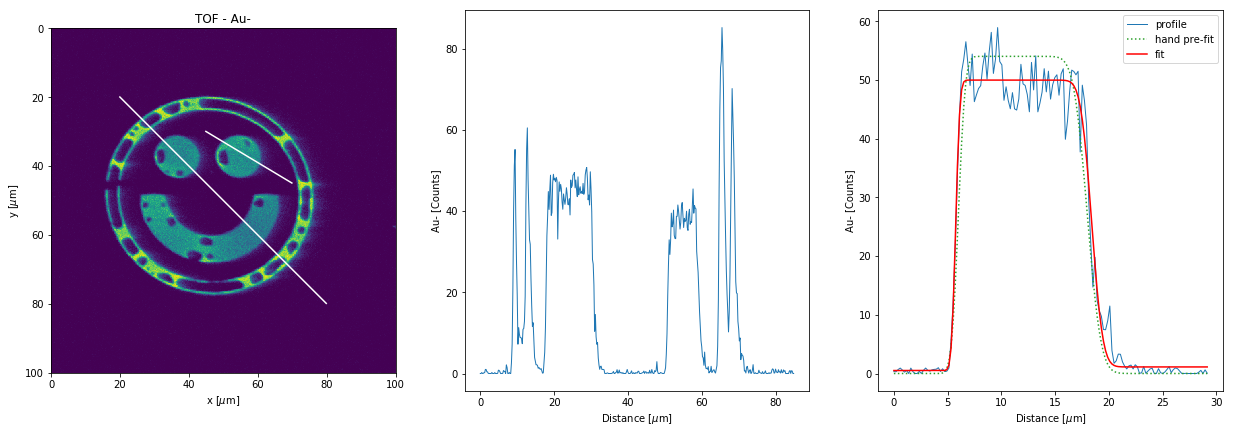

In [28]:
fig, ax = plt.subplots(1,3,figsize=(21,7))

Au = col['Au-']
Au.show(ax=ax[0], flip=True, cmap='viridis')
Au.plot_profile(20,20,80,80,ax=ax[1],img=ax[0],pixels=False);
p = Au.plot_profile(45,30,70,45,ax=ax[2],img=ax[0],pixels=False,label="profile");
p0 = [0, 54, 6, .5, -54, 18, 1]
ax[2].plot(p['l'], pySPM.utils.fit.CDF(p['l'], *p0), 'C2:', label="hand pre-fit")
p0, _ = pySPM.utils.fit.CDF_fit(p['l'], p['z'], p0)
ax[2].plot(p['l'], pySPM.utils.fit.CDF(p['l'], *p0), 'r', label="fit")
ax[2].legend();
# pySPM.const.gfact is the factor between the σ value and the FWHM of a Gaussian
print("FWHM left-edge:{:.1f}nm  right-edge: {:.1f}nm".format(p0[3]*1000*pySPM.const.gfact, p0[6]*1000*pySPM.const.gfact))

As we can see here we have a different edge profile on the left and on the right. Maybe this is due to thermal drift?
Let's investigate that by looking at a cross-secion per scan

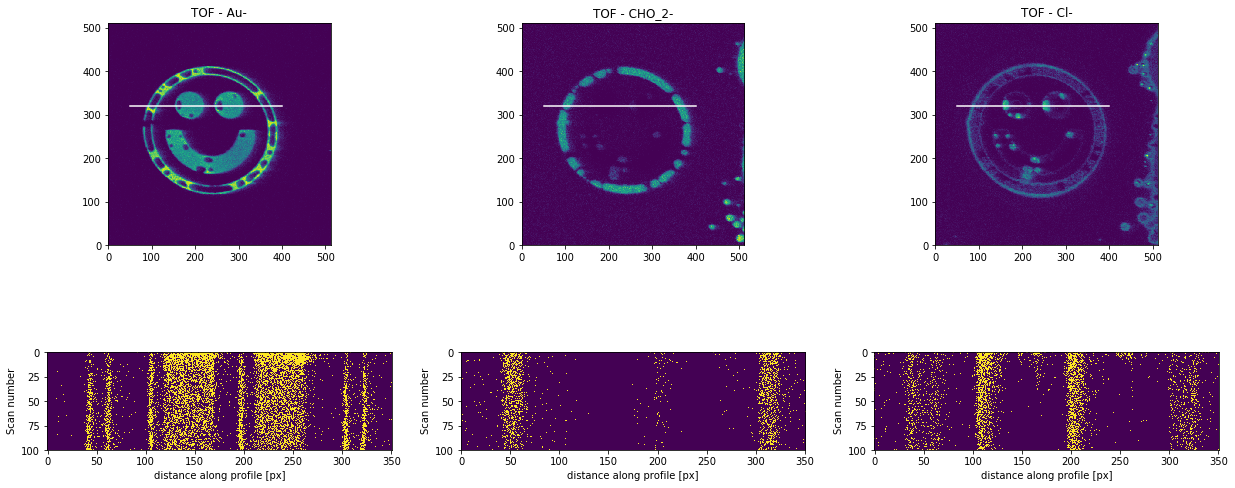

In [29]:
fig, ax = plt.subplots(2, 3, figsize=(21, 9))
elt = "Au"
B.getAddedImageByName(elt)[0].show(ax=ax[0,0], flip=True, cmap='viridis', pixels=True);
x1, y1 = 50, 320
x2, y2 = 400, y1
xsec = B.getXsectionByMass(x1, y1, x2, y2, pySPM.utils.get_mass(elt), ax=ax[0,0]);
ax[1,0].imshow(xsec)
ax[1,0].set_xlabel("distance along profile [px]")
ax[1,0].set_ylabel("Scan number");

elt = "CHO_2"
B.getAddedImageByName(elt)[0].show(ax=ax[0,1], flip=True, cmap='viridis', pixels=True);
xsec = B.getXsectionByMass(x1, y1, x2, y2, pySPM.utils.get_mass(elt), ax=ax[0,1]);
ax[1,1].imshow(xsec)
ax[1,1].set_xlabel("distance along profile [px]")
ax[1,1].set_ylabel("Scan number");

elt = "Cl"
B.getAddedImageByName(elt)[0].show(ax=ax[0,2], flip=True, cmap='viridis', pixels=True);
xsec = B.getXsectionByMass(x1, y1, x2, y2, pySPM.utils.get_mass(elt), ax=ax[0,2]);
ax[1,2].imshow(xsec)
ax[1,2].set_xlabel("distance along profile [px]")
ax[1,2].set_ylabel("Scan number");

We don't see a real drift during the measurement. We can see that the asymmetry is stronger for the first few scans for the Au channel than for the rest.
Let's investigate it by performing a circular_profile

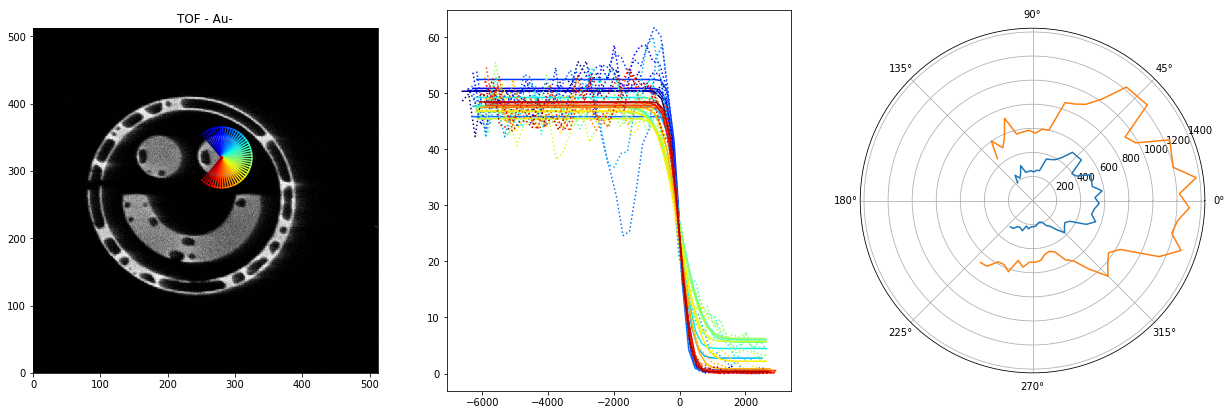

In [30]:
fig, ax = plt.subplots(1, 3, figsize=(21, 7))
Au = col['Au-']
Au.show(ax=ax[0], flip=True, pixels=True)
axP = plt.subplot(133, projection='polar')
Au.circular_profile(280, 320, Ra=45, width=2, axImg=ax[0], axProfile=ax[1], axPolar=axP, A=-130, B=130, N=50, plotProfileEvery=3);

Let's try to have a look at other channels

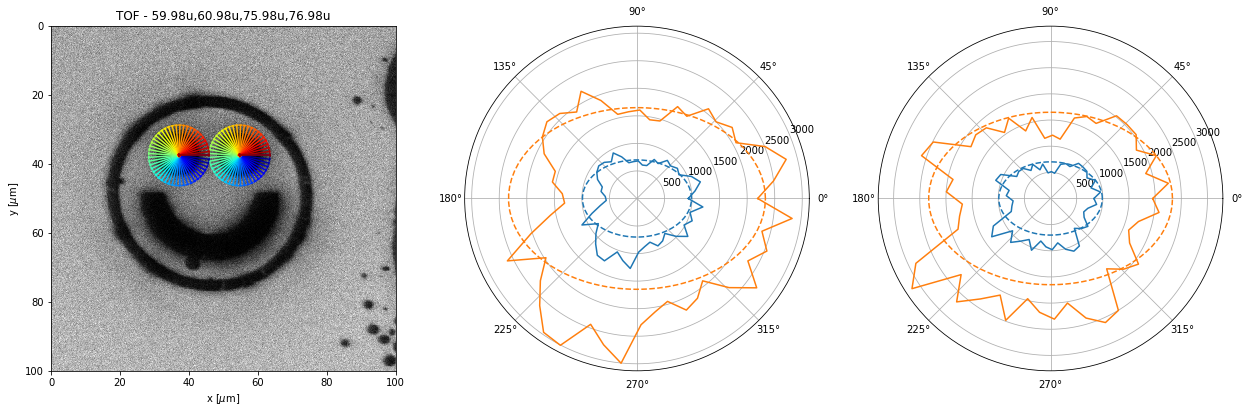

In [31]:
Substrate = B.getAddedImageByMass([60,61,76,77])
fig, ax = plt.subplots(1,3,figsize=(21,7))
Substrate.show(ax=ax[0], flip=True);
axP = plt.subplot(132, projection='polar')
axP2 = plt.subplot(133, projection='polar')
Substrate.circular_profile(280, 320, Ra=45, width=3, axImg=ax[0], axPolar=axP, N=50, plotProfileEvery=3);
Substrate.circular_profile(190, 320, Ra=45, width=3, axImg=ax[0], axPolar=axP2, N=50, plotProfileEvery=3);
s = 700
phi = np.radians(np.linspace(0,360, 100))
axP.plot(phi, pySPM.utils.ellipse(s*np.sqrt(2),s,phi),'--')
axP.plot(phi, pySPM.const.gfact*pySPM.utils.ellipse(s*np.sqrt(2),s,phi),'--')
axP2.plot(phi, pySPM.utils.ellipse(s*np.sqrt(2),s,phi),'--')
axP2.plot(phi, pySPM.const.gfact*pySPM.utils.ellipse(s*np.sqrt(2),s,phi),'--');

The profiles looks fine with a √2 ratio between the *x* and *y* axis for the other channel, so we can assume that it comes from the *Au* channel. maybe a fabrication articats? In order to prove it the measurement should be redone with sample rotated. There is so much other functions to look at that we are going to investigate something else for now.

## PCA
You can run PCA on any collection. This will run on all the image channels found in the collection.
You can specifiy the number of PC you want to display and add the parameter loadings=True in order to display them as a hinton plot

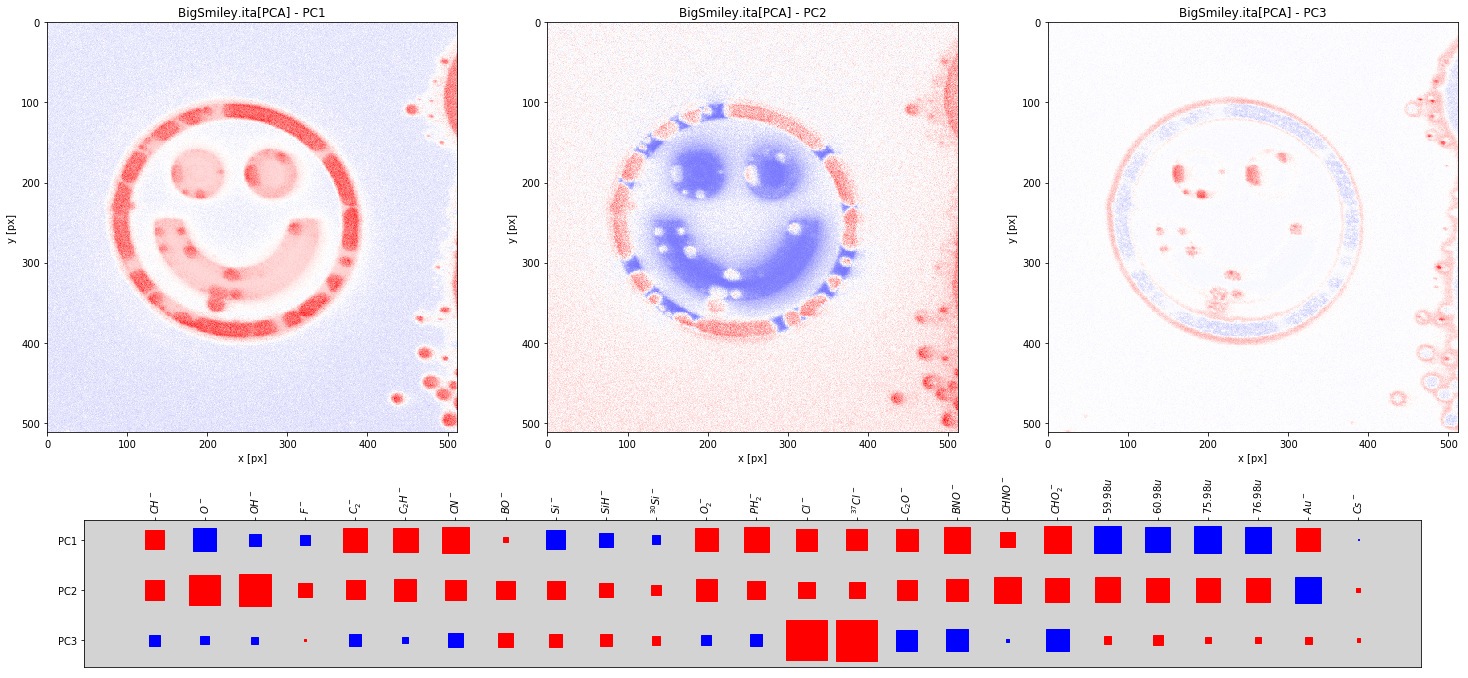

In [32]:
L = col.showPCA(3, loadings=True, flip=True)